![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

**José Wilson Conceição de Souza - 
DRE: 122071379**

Ideias e funções: Luan Lima \& Bernardo Costa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando o mínimo de uma função

Encontrar o mínimo de uma função derivável é (quase) equivalente a resolver a equação $f'(x) = 0$.

Vamos explorar algumas destas ideias.

# 1: Funções básicas

## Métodos de bisseção e Newton

In [2]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do intervalo ficar menor do que  xtol,
    ou quando o valor absoluto da função ficar abaixo de  ytol.
    """
    pts=[a, b]
    while True:
        z=(a+b)/2
        pts.append(z)
        if abs(f(z))<ytol or abs(b-a)<xtol:
            break
        if f(a)*f(z)>0 and f(b)*f(z)>0:
            return 'A função não possui raíz nesse intervalo.'
        if f(a)*f(z)<0:
            b=z
        if f(b)*f(z)<0:
            a=z
    return pts

In [3]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do passo é menor do que  xtol,
    quando o valor absoluto da função ficar abaixo de  ytol,
    ou após  maxiter  iterações.
    """
    pontos=[x]
    inter=0
    while True:
        i=pontos[inter]
        xn=i-f(i)/df(i)
        if abs(xn-i)<=xtol or abs((xn-i)/xn)<=ytol or inter>maxiter:
            break
        pontos.append(xn)
        inter+=1
    return pontos

## Derivadas numéricas

Dê, abaixo, as funções para calcular a primeira e a segunda derivadas numéricas.

In [4]:
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h"""
    return (f(x+h) - f(x-h))/(2*h)

def ddf_central(f, x, h=1e-4):
    """Aproximação da segunda derivada de  f  em  x, usando a derivada central iterada com passo  h."""
    return (df_central(f,x+h)-df_central(f,x-h))/(2*h)


## Erro de aproximação da derivada central iterada

Varie $h$ no intervalo $[2^{-27}, 2^0]$,
e faça um gráfico do erro da derivada central iterada para derivada segunda,
para a exponencial em $x = 0$.

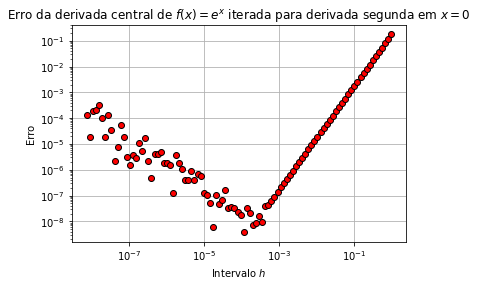

In [5]:
hs = np.logspace(-27,0,base=2, num=100)
erro=ddf_central(np.exp,0,hs)-np.exp(0)
plt.loglog(hs,abs(erro),color="black", linestyle='', marker='o', markerfacecolor='red')
plt.title('Erro da derivada central de $f(x)=e^x$ iterada para derivada segunda em $x=0$')
plt.xlabel("Intervalo $h$")
plt.ylabel("Erro")
plt.grid()
ax = plt.gca()

ax = plt.gca()

In [6]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Como esse gráfico muda se escolhermos outros pontos no intervalo $[-2,2]$?
- Use erros relativos; e
- faça várias curvas no mesmo gráfico.

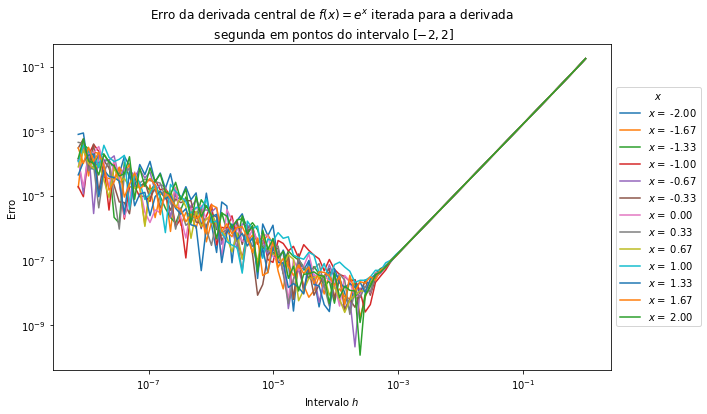

In [7]:
hs = np.logspace(-27,0,base=2, num=100)
xs=np.linspace(-2,2,13)
erros=[(ddf_central(np.exp,x,hs)-np.exp(x))/np.exp(x) for x in xs]
plt.figure(figsize=(10,6))
for erro in erros:
    plt.loglog(hs,abs(erro))
plt.legend([f'$x=$ {x:.2f}' for x in xs], title='$x$', bbox_to_anchor=(1,0.5), loc="center left")
plt.title('Erro da derivada central de $f(x)=e^x$ iterada para a derivada \n segunda em pontos do intervalo $[-2, 2]$')
plt.xlabel('Intervalo $h$')
plt.ylabel('Erro')
ax = plt.gca()

In [8]:
assert len(ax.lines) >= 8
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Comente.

**Resposta**

_O comportamento do erro é semelhante ao caso em  $x=0$. Conforme o intervalo $h$ se torna grande demais (a partir de $10^{-3}$), os erros aumentam. Percebe-se que há um intevalo ideal para $h$, compreemdido entre $10^{-5}$ e $10^{-3}$._

# 2: Um problema modelo

Vamos minimizar a função $f(x) = e^x - 2x$.

In [9]:
def f(x):
    return np.exp(x) - 2*x

## Preparando a bisseção

Escreva 3 funções:
- a derivada analítica $g_1(x) = f'(x)$
- a derivada central $g_2(x)$ com passo `h = 1e-3`
- a derivada central $g_2(x)$ com passo `h = 1e-5`

In [10]:
def g1(x):
    return np.exp(x)-2

def g2(x):
    return df_central(f,x,1e-3)

def g3(x):
    return df_central(f,x,1e-5)

In [11]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(g1(x), g2(x)), x
    assert np.isclose(g1(x), g3(x)), x

Faça o gráfico de $f(x)$ e determine um intervalo para fazer bisseção para encontrar um zero da derivada.

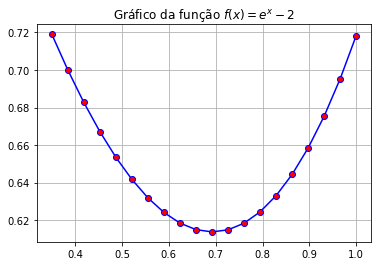

In [12]:
x=np.linspace(0.35,1,20)
plt.plot(x, f(x), color='blue', linestyle='solid',marker='o', markerfacecolor="red")
plt.title("Gráfico da função $f(x)=e^x-2$")
plt.grid()

ax = plt.gca()

In [13]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

Qual intervalo você escolheria?
Porquê?

**Resposta**

_Escolheria o intervalo $[0.6,0.8]$ pois nota-se que nesse intervalo a função possui um ponto de mínimo, onde a derivada se anula._

## Gráficos da bisseção

Aplique o método da bisseção usando $g_1$, $g_2$ e $g_3$ para encontrar uma raiz de $f$.

Faça um gráfico mostrando como evolui (ao longo das iterações)
a distância do ponto considerado até a raiz ($\log(2)$),
para cada um dos métodos.

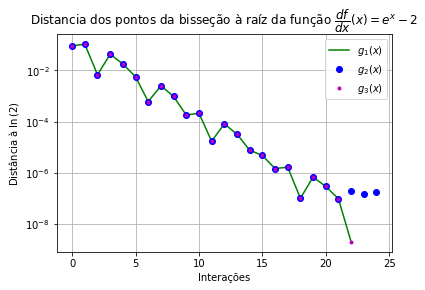

In [14]:
y1=abs(bissecao_pts(g1,0.6,0.8)-np.log(2))
y2=abs(bissecao_pts(g2,0.6,0.8)-np.log(2))
y3=abs(bissecao_pts(g3,0.6,0.8)-np.log(2))
plt.semilogy(y1, color='green', label='$g_1(x)$')
plt.semilogy(y2,'bo' ,label='$g_2(x)$')
plt.semilogy(y3,'m.',label='$g_3(x)$')
plt.xlabel("Interações")
plt.ylabel('Distância à $\ln{(2)}$')
plt.legend()
plt.title('Distancia dos pontos da bisseção à raíz da função $\dfrac{df}{dx}(x)=e^x-2$')
plt.grid()
ax = plt.gca()

In [15]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

O que você vê no gráfico acima?
Como você explica?

**Resposta**

_As derivadas numéricas comportam-se de maneira iguais até a vigésima interação, porém, a partir deste ponto a derivada numérca com passo $h=1e-3$ passa a não ter um melhor desempenho, pois o erro cometido com essa escolha de função ($g_2(x)$) não se reduz com as interações. Assim, $g_3(x)$ torna-se uma escolha melhor, dado que está contida na linha de $g_1(x)$, reduzindo o erro com aumento no número de interações._

## Newton

Para usar o método de Newton, será necessário usarmos mais uma derivada numérica.

Implemente
- $h_1(x)$, a segunda derivada analítica, e
- $h_2(x)$ a derivada numérica (que pode ser obtida a partir de `ddf_central`).

In [16]:
def h1(x):
    return np.exp(x)

def h2(x):
    return ddf_central(f,x)

In [17]:
np.random.seed(41)
for x in np.random.randn(10):
    assert np.isclose(h1(x), h2(x)), x

Agora, aplique o método de Newton (com tolerâncias padrão):
- com ambas as derivadas analíticas
- com a primeira derivada analítica, e a segunda numérica
- com ambas as derivadas numéricas (use a "melhor" derivada central que você puder).

Faça, como no caso da bisseção, o gráfico da distância até a mínimo da função.

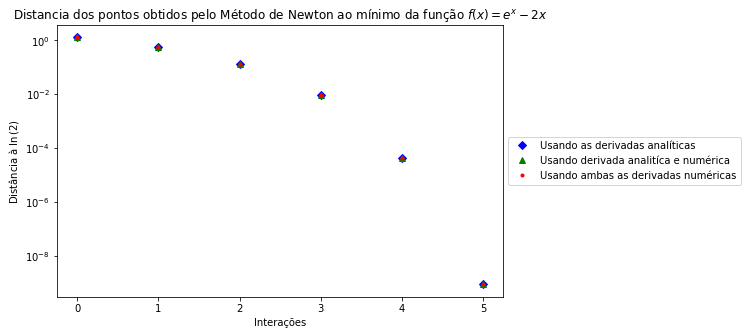

In [18]:
y1=abs(newton_pts(g1,h1,2)-np.log(2))
y2=abs(newton_pts(g1,h2,2)-np.log(2))
y3=abs(newton_pts(g3,h2,2)-np.log(2))
plt.figure(figsize=(8,5))
plt.semilogy(y1,'Db', label='Usando as derivadas analíticas')
plt.semilogy(y2,'g^',label='Usando derivada analitíca e numérica')
plt.semilogy(y3,'r.',label='Usando ambas as derivadas numéricas')
plt.xlabel("Interações")
plt.ylabel('Distância à $\ln{(2)}$')
plt.legend(title="", bbox_to_anchor=(1,0.5), loc="center left")
plt.title('Distancia dos pontos obtidos pelo Método de Newton ao mínimo da função $f(x)=e^x-2x$')

ax = plt.gca()

In [19]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, reduza ambas as tolerâncias do método para `1e-15`, e refaça os gráficos.

Text(0.5, 1.0, 'Distância dos pontos obtidos pelo Método de Newton ao mínimo da função $f(x)=e^x-2x$')

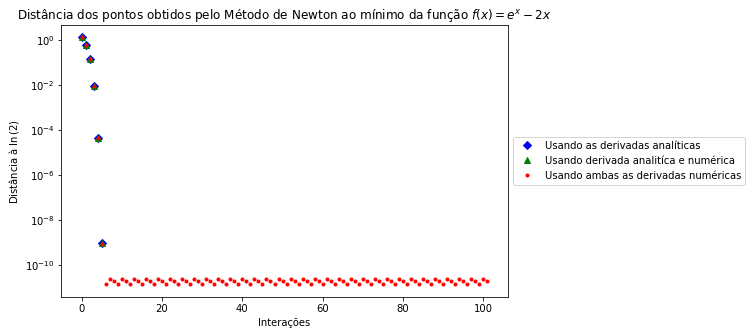

In [20]:
y1=abs(newton_pts(g1,h1,2,1e-15,1e-15)-np.log(2))
y2=abs(newton_pts(g1,h2,2,1e-15,1e-15)-np.log(2))
y3=abs(newton_pts(g3,h2,2,1e-15,1e-15)-np.log(2))
plt.figure(figsize=(8,5))
plt.semilogy(y1,'Db', label='Usando as derivadas analíticas')
plt.semilogy(y2,'g^',label='Usando derivada analitíca e numérica')
plt.semilogy(y3,'r.',label='Usando ambas as derivadas numéricas')
plt.xlabel("Interações")
plt.ylabel('Distância à $\ln{(2)}$')
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.title('Distância dos pontos obtidos pelo Método de Newton ao mínimo da função $f(x)=e^x-2x$')

Deveria haver (pelo menos) duas diferenças entre este gráfico e o anterior.

- Quais você observa?
- Como você as explica?

**Resposta**

_Os eixos se alteraram e, também, usando ambas as derivadas numéricas, houve um loop até atingir o máximo das interações colocado como defult. Ou seja, como as tolerâncias ficaram extremamente baixas, ao utilizar as derivadas numéricas como modelo de estimação da distância, não houve interações suficientes para se chegar abaixo ou igual às tolerâncias colocadas, porém o loop acaba ao atigir o número máximo de interações._

# 3: O mesmo problema, mais complicado

Queremos achar o mínimo da função $$ f(x) = e^{x^2-2x+1}-2^{x^3-6x+12} $$
no intervalo $[-2,2]$.

Defina $f$, e faça um gráfico para encontrar um intervalo para bisseção e um ponto inicial para Newton.

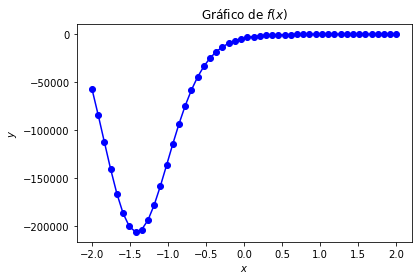

In [21]:
def f(x):
    return np.exp(x**2-2*x+1)-2**(x**3-6*x+12)
x=np.linspace(-2,2)
y=f(x)
plt.plot(x,y,'bo-')
plt.title('Gráfico de $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')

ax = plt.gca()

In [22]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

yvals = ax.lines[0].get_ydata()
assert min(yvals) <= -20000
assert np.all(yvals <= 0)

Defina a derivada (analítica) de f:

In [23]:
def g1(x):
    return 2*(np.exp((x-1)**2)*(x-1))-3*(2**((x**3)-6*x+12))*((x**2)-2)*np.log(2)

In [24]:
np.random.seed(2022)
for x in np.random.randn(10):
    assert np.isclose(g1(x), df_central(f, x), rtol=1e-8)

Calcule a raiz exata (a menos da precisão) do computador,
aplicando o método da bisseção à derivada analítica de $f$.

In [25]:
xs_bissecao=bissecao_pts(g1,-1.5,-1,1e-15,1e-15)
xraiz=xs_bissecao[-1]
xraiz

-1.412872403203108

Calcule o valor de $f$ nos pontos obtidos.
Em qual/quais deles ocorreu o mínimo?

In [26]:
fs=[f(x) for x in xs_bissecao]
m=[]
for x in xs_bissecao:
    if f(x)==min(fs):
        m.append(x)
m

[-1.4128724038600922, -1.412872403219808]

Qual a distância deste ponto ao último ponto produzido pela bisseção?

In [27]:
dist=abs(np.array(m)-xraiz)
dist

array([6.56984245e-10, 1.66999747e-11])

O que você acha que aconteceu?

**Resposta**

_Como foram encontrados dois valores de mínimos para $f(x)$, podemos induzir que o python interpretou como iguais dois valores baixos, dos quais possuem uma diferença bastante pequena quando comparado com a raiz encontrada pelo método da bisseção. Assim, dentre a lista de valores de $f(x)$, os números -1.4128724038600922 e -1.412872403219808 foram detectados como mínimos._

Agora, compare o erro com o método da bisseção e o de Newton, usando as derivadas numéricas.

Como sugerem as contas acima, aqui há vários problemas de precisão numérica.
Assim, tente botar tolerâncias pequenas, mas não pequenas demais para seus métodos.

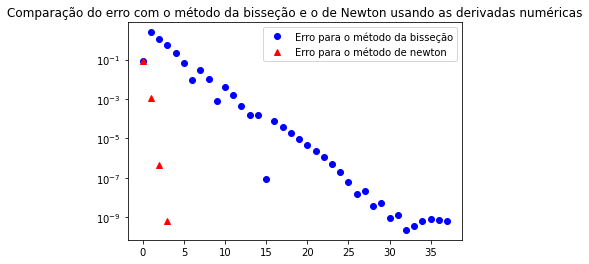

In [28]:
def df(x):
    return df_central(f,x)
def ddf(x):
    return ddf_central(f,x)

Ebis=np.array(bissecao_pts(df,-1.5,1,1e-10,1e-10))-min(m)
Enew=np.array(newton_pts(df,ddf,-1.5,1e-10,1e-10))-min(m)

plt.semilogy(abs(Ebis), 'ob', label='Erro para o método da bisseção')
plt.semilogy(abs(Enew), 'r^', label='Erro para o método de newton')
plt.title('Comparação do erro com o método da bisseção e o de Newton usando as derivadas numéricas')
plt.legend()
ax = plt.gca()

In [29]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [30]:
for l in ax.lines:
    ys = l.get_ydata()
    assert min(abs(ys)) < 1e-8